The dataset that I am using to analyze the data about billionaires around the world was curated by Forbes and is downloaded from Kaggle. The dataset contains information about global billionaires in 2021

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [130]:
import plotly.express as px
import plotly.graph_objects as go

In [92]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
data = pd.read_csv("forbes_2022_billionaires.csv")

In [64]:
df=data.copy()

In [65]:
df.head(2)

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."


In [66]:
df.shape

(2668, 22)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rank                  2668 non-null   int64  
 1   personName            2668 non-null   object 
 2   age                   2582 non-null   float64
 3   finalWorth            2668 non-null   float64
 4   year                  2668 non-null   int64  
 5   month                 2668 non-null   int64  
 6   category              2668 non-null   object 
 7   source                2668 non-null   object 
 8   country               2655 non-null   object 
 9   state                 748 non-null    object 
 10  city                  2624 non-null   object 
 11  countryOfCitizenship  2668 non-null   object 
 12  organization          352 non-null    object 
 13  selfMade              2668 non-null   bool   
 14  gender                2652 non-null   object 
 15  birthDate            

In [68]:
# lets drop some of the columns, not necessary
df.drop(['birthDate','numberOfSiblings','bio','about'],axis=1,inplace=True)

In [69]:
# len(df['country'].unique())

In [70]:
# printing null values
null=df.isnull().sum()
null=null[null>0]
null=null.sort_values(ascending=False)
null

organization         2316
philanthropyScore    2272
title                2267
residenceMsa         2029
state                1920
age                    86
city                   44
gender                 16
country                13
dtype: int64

In [71]:
# missing percentage
miss_per=pd.DataFrame(null,columns=['missing'])
miss_per['missing%']=miss_per['missing']/df.shape[0]*(100)
miss_per

,missing,missing%
organization,2316,86.806597
philanthropyScore,2272,85.157421
title,2267,84.970015
residenceMsa,2029,76.049475
state,1920,71.964018
age,86,3.223388
city,44,1.649175
gender,16,0.599700
country,13,0.487256


> We have 5 columns that have missing percentage greater than 70 %, we will simply drop these columns

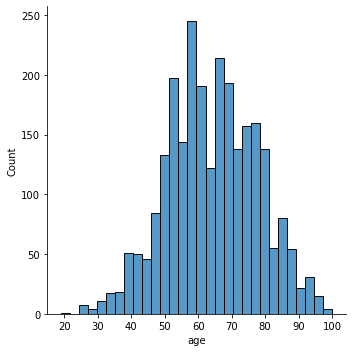

In [72]:
sns.displot(x=df['age'])
# we can see that age is normally distributed and hence we can use mean value to fill the missing values in missed values

> It follows gaussion distribution, most of the data are concentrated around mean, we can procedd filling missed values using mean value

In [73]:
# dealing with age columns

In [74]:
df['age'].std()

13.401258058138882

In [75]:
df['age'].mean()

64.21068938807126

In [76]:
mean=df['age'].mean()

In [77]:
df['age'].fillna(mean,inplace=True)

In [78]:
# printing records where city is missing
# df[df['city'].isnull()]

#### dropping columns having missing values more than 70%

In [79]:
df.drop(['organization','philanthropyScore','title','state','residenceMsa'],axis=1,inplace=True)

In [80]:
df.shape

(2668, 13)

#### dropping rows 

In [81]:
df.dropna(inplace=True)
df.isnull().sum().sum()

0

In [82]:
df.head(2)

,rank,personName,age,finalWorth,year,month,category,source,country,city,countryOfCitizenship,selfMade,gender
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Austin,United States,True,M
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Seattle,United States,True,M


**From here we will explore various features of our dataset, one by one**

In [83]:
len(df['personName'].unique()),df.shape[0]

(2608, 2610)

In [90]:
# Which age group has most number of rich

age= df['age'].value_counts(ascending=False).head(10)
age

59.0    82
57.0    81
58.0    80
54.0    76
56.0    75
60.0    74
72.0    74
65.0    71
66.0    70
67.0    70
Name: age, dtype: int64

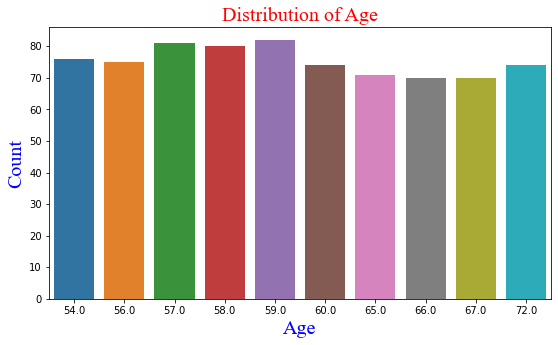

In [100]:
plt.figure(figsize=(9,5))
sns.barplot(age.index,age.values)
plt.title('Distribution of Age',fontdict={'family':'times new roman','size':20,'color':'red'})
plt.xlabel('Age',fontdict={'family':'times new roman','size':20,'color':'blue'})
plt.ylabel('Count',fontdict={'family':'times new roman','size':20,'color':'blue'})
plt.show()

#### Who is the richest person, details about him

In [106]:
top_riches=df.sort_values(by='finalWorth',ascending=False).head(15)
top_riches[0:5]

,rank,personName,age,finalWorth,year,month,category,source,country,city,countryOfCitizenship,selfMade,gender
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Austin,United States,True,M
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Seattle,United States,True,M
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,Paris,France,False,M
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Medina,United States,True,M
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Omaha,United States,True,M


> from the above sorted dataset,we can see that Elon musk is the person with highest networth of 219000.0, aged 50

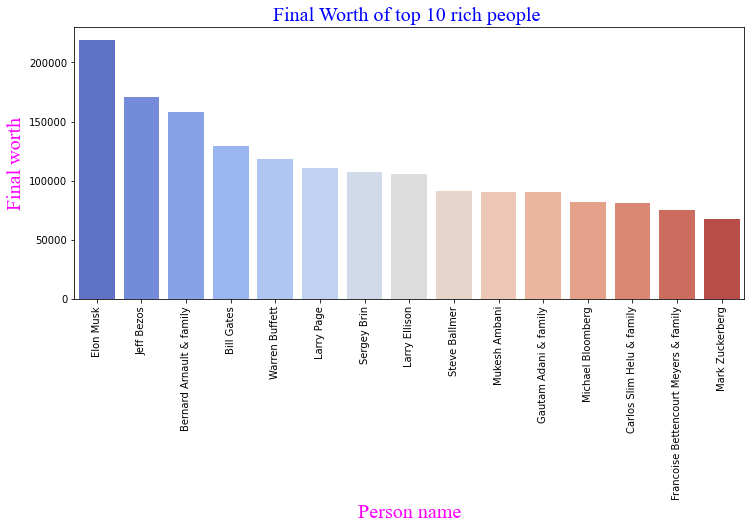

In [115]:
plt.figure(figsize=(12,5))
sns.barplot(top_riches.personName,top_riches.finalWorth,palette='coolwarm')
plt.title('Final Worth of top 10 rich people ',fontdict={'family':'times new roman','size':20,'color':'blue'})
plt.xlabel('Person name',fontdict={'family':'times new roman','size':20,'color':'magenta'})
plt.xticks(rotation=90)
plt.ylabel('Final worth',fontdict={'family':'times new roman','size':20,'color':'magenta'})
plt.show()

#### Which country has maximum number of rich peoples

In [120]:
country=df['country'].value_counts(ascending=False)

In [121]:
country.head(10)

United States     744
China             568
India             156
Germany           109
United Kingdom     82
Switzerland        69
Hong Kong          67
Russia             65
Brazil             53
Italy              49
Name: country, dtype: int64

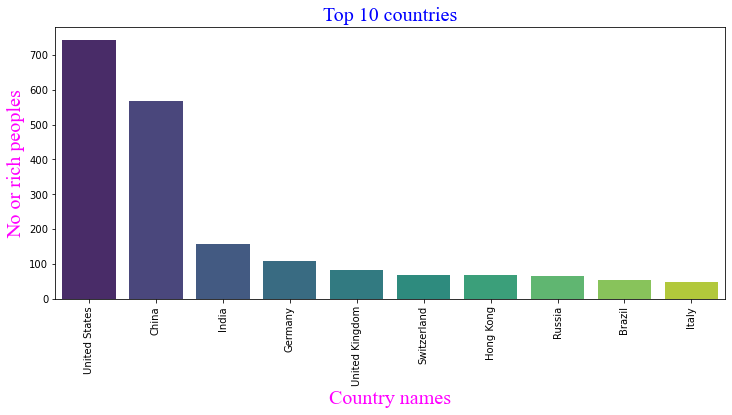

In [122]:
plt.figure(figsize=(12,5))
sns.barplot(country.head(10).index,country.head(10).values,palette='viridis')
plt.title('Top 10 countries',fontdict={'family':'times new roman','size':20,'color':'blue'})
plt.xlabel('Country names',fontdict={'family':'times new roman','size':20,'color':'magenta'})
plt.xticks(rotation=90)
plt.ylabel('No or rich peoples',fontdict={'family':'times new roman','size':20,'color':'magenta'})
plt.show()

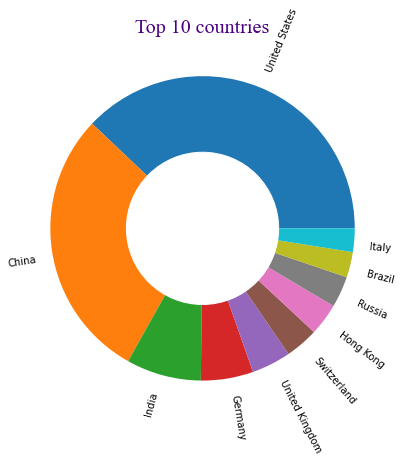

In [127]:
plt.figure(figsize=(7,7))
plt.pie(country.head(10).values,labels=country.head(10).index,rotatelabels=90)
cc=plt.Circle((0,0),0.5,color='white')
fig=plt.gcf()
fig.gca().add_artist(cc)
plt.title("Top 10 countries",fontdict={'family':'times new roman','size':20,'color':'indigo'})
plt.show()

In [ ]:
# Top 10 richest person in india

In [133]:
india=df[df['country']=='India']
india=india.sort_values(by='finalWorth',ascending=False)

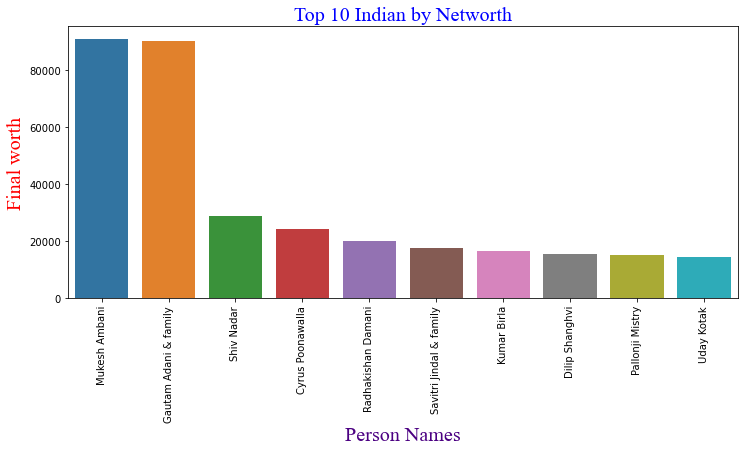

In [137]:
plt.figure(figsize=(12,5))
sns.barplot(india.personName.head(10),india.finalWorth.head(10))
plt.title('Top 10 Indian by Networth',fontdict={'family':'times new roman','size':20,'color':'blue'})
plt.xlabel('Person Names',fontdict={'family':'times new roman','size':20,'color':'indigo'})
plt.xticks(rotation=90)
plt.ylabel('Final worth',fontdict={'family':'times new roman','size':20,'color':'red'})
plt.show()

In [138]:
india[['personName','finalWorth']].head(10)

,personName,finalWorth
9,Mukesh Ambani,90700.0
10,Gautam Adani & family,90000.0
46,Shiv Nadar,28700.0
56,Cyrus Poonawalla,24300.0
80,Radhakishan Damani,20000.0
91,Savitri Jindal & family,17700.0
105,Kumar Birla,16500.0
114,Dilip Shanghvi,15600.0
124,Pallonji Mistry,15000.0
128,Uday Kotak,14300.0


- Mukesh Ambani was the most rich person in india in 2018, followed by Gautam Adani, shiv nadar, cyrus poonawalla etc
- Notice that, difference between final worth of Mukesh Ambani aur Gautam Adani famliy is negligible
- Shiv nadar is the third richest person in india, but difference in final worth from top two rich people in the country is thrice time less.

In [139]:
india['city'].value_counts(ascending=False)

Mumbai        51
Delhi         35
Bangalore     18
Hyderabad     10
Chennai        9
Ahmedabad      8
Pune           6
Kolkata        6
Hisar          1
Ludhiana       1
Gurgaon        1
Cochin         1
Haridwar       1
Vadodara       1
Aurangabad     1
Baroda         1
Ernakulam      1
Trivandrum     1
Kottayam       1
Nagpur         1
Jaipur         1
Name: city, dtype: int64

In [38]:
# type(df['NetWorth'])
# df.dtypes
# df['NetWorth'].dtype

# since column 'NetWorth' is object type, so we need to change it to numerical type
# df['NetWorth']=df['NetWorth'].astype(float)
# df['NetWorth'].dtype
# df.head(2)
# df['NetWorth'][0:5]
# Now it looks fine, The dollar sign and 'B' billion sign has been removed

# # Now we will sort values of "Networth" column and will make a new dataframe with it.
# sorted_df=df.sort_values(by='NetWorth',ascending=False).reset_index()
# sorted_df.head()

# sorted_df.drop(columns='index',inplace=True)
# sorted_df.head(2)

# plt.figure(figsize=(15,8))
# sns.histplot(x='Name',hue='NetWorth',data=sorted_df)
# plt.xticks(rotation=90)
# plt.show()

([<matplotlib.patches.Wedge at 0x23f2f028040>,
 [Text(0.6465637858537406, 0.8899186877588752, 'Facebook'),
  Text(1.046162158377023, -0.3399187231970734, 'Berkshire Hathaway'),
  Text(-5.149471629032507e-08, -1.0999999999999988, 'software'),
  Text(-1.0461621902025062, -0.3399186252483017, 'Google'),
  Text(-0.6465637025335373, 0.8899187482945414, 'medical devices')])

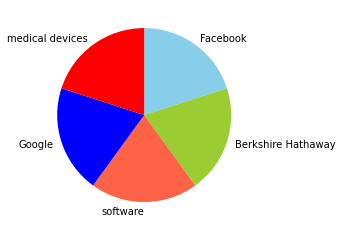

In [44]:
# drawing a piet graph
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.pie(sources, labels=index,rotatelabels=False,startangle=90,counterclock=False,colors=custom_colors)

### Top 5 countries with the most number of billionaires:

In [61]:
top_5_countries=data['Country'].value_counts().head()

In [62]:
top_5_countries

United States    724
China            626
India            140
Germany          136
Russia           118
Name: Country, dtype: int64

In [63]:
top_5_countries.index

Index(['United States', 'China', 'India', 'Germany', 'Russia'], dtype='object')

In [64]:
top_5_countries.values

array([724, 626, 140, 136, 118], dtype=int64)

In [65]:
index=top_5_countries.index
countries=top_5_countries.values

In [66]:
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]

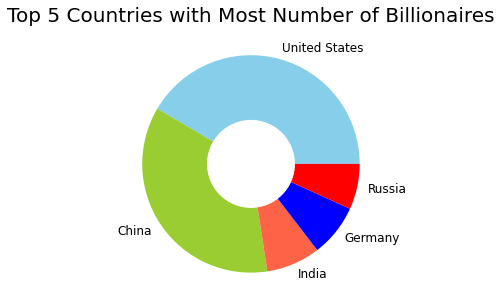

In [72]:
plt.figure(figsize=(5, 5))
plt.pie(countries, labels=top_5_countries.index, colors=custom_colors)

central_circle = plt.Circle((0, 0), 0.4, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 5 Countries with Most Number of Billionaires", fontsize=20)
plt.show()

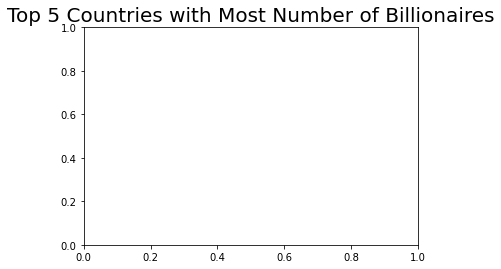

### Top 5 industries with the most number of billionaires

In [73]:
top_5_industries=data['Industry'].value_counts().head()

In [74]:
top_5_industries

Finance & Investments    371
Technology               365
Manufacturing            331
Fashion & Retail         273
Healthcare               221
Name: Industry, dtype: int64

In [76]:
index=top_5_industries.index

In [77]:
industries=top_5_industries.values

In [78]:
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]

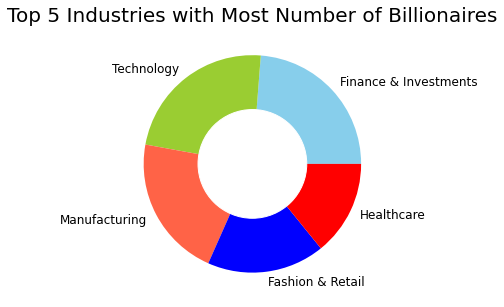

In [79]:
plt.figure(figsize=(5,5))
plt.pie(industries,labels=index,colors=custom_colors)
central_circle=plt.Circle((0,0),0.5,color='white')

fig=plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font',size=12)
plt.title("Top 5 Industries with Most Number of Billionaires", fontsize=20)
plt.show()